In [1]:
import os
import numpy as np
import pydicom
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models


In [7]:
# Path to your DICOM bulk data
# Change this to your folder path
data_dir = r"dicom_data_bulk"

# Image size for CNN
IMG_SIZE = (128, 128)

# Number of classes (change later once you know your labels)
NUM_CLASSES = 2  # Example: Disease vs No Disease


In [3]:
def load_dicom_images_from_folder(folder_path, img_size=(128, 128)):
    images = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".dcm"):
            dicom_path = os.path.join(folder_path, file_name)
            dicom_data = pydicom.dcmread(dicom_path)
            img = dicom_data.pixel_array
            img = cv2.resize(img, img_size)
            img = img / np.max(img)  # normalize
            images.append(img)
    return np.array(images)


In [ ]:
all_images = []
all_labels = []  # <-- You must fill this with actual labels

for patient_folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, patient_folder)
    if os.path.isdir(folder_path):
        imgs = load_dicom_images_from_folder(folder_path, IMG_SIZE)
        all_images.extend(imgs)
        
        # Example: assign label based on folder name (change this logic later)
        label = 0 if "normal" in patient_folder.lower() else 1
        all_labels.extend([label] * len(imgs))

all_images = np.array(all_images)[..., np.newaxis]  # Add channel dimension
all_labels = np.array(all_labels)


In [10]:
# Normalize pixel values to [0,1]
all_images = all_images.astype("float32") / np.max(all_images)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (448, 128, 128, 1) Test shape: (112, 128, 128, 1)


In [12]:
IMG_SIZE = 128  # or set as integer

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     6,422,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,515,329 (24.85 MB)

 Trainable params: 6,515,329 (24.85 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step - accuracy: 1.0000 - loss: 0.1489 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 257ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 274ms/step 

In [14]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 1.00


In [15]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

print("First 10 Predictions:", predictions[:10].ravel())
print("First 10 True Labels:", y_test[:10])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
First 10 Predictions: [1 1 1 1 1 1 1 1 1 1]
First 10 True Labels: [1 1 1 1 1 1 1 1 1 1]


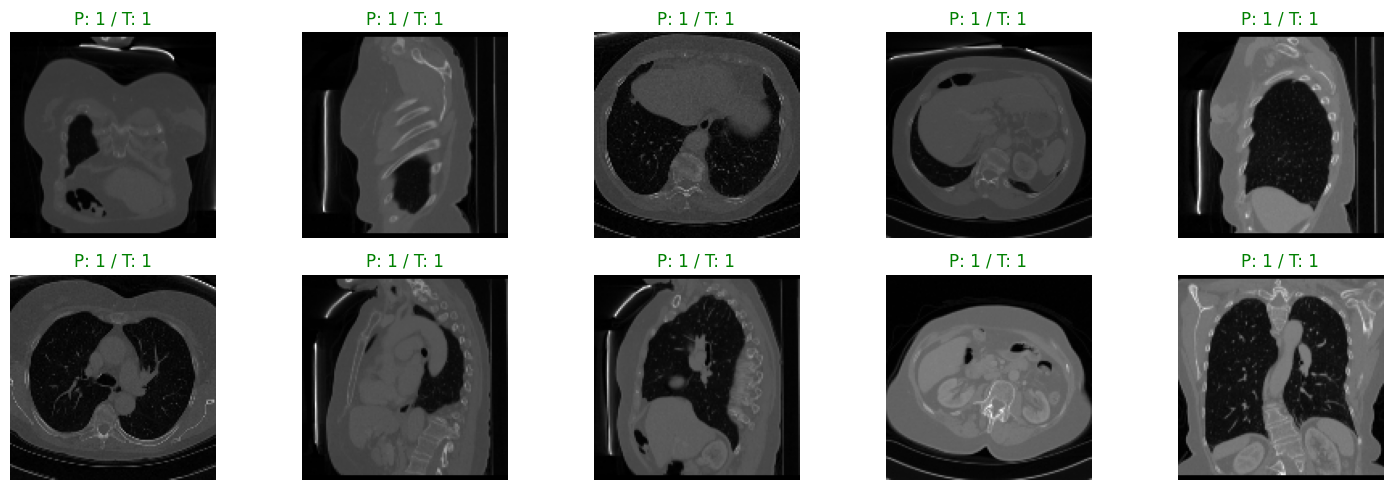

In [16]:
import matplotlib.pyplot as plt

# Number of samples to display
num_samples = 10

plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns
    plt.imshow(X_test[i].squeeze(), cmap="gray")  # remove extra channel
    pred_label = predictions[i][0]
    true_label = y_test[i]
    
    color = "green" if pred_label == true_label else "red"
    plt.title(f"P: {pred_label} / T: {true_label}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()


c:\Users\Ankita\Desktop\university 4th year\DL LAB\tf-env\lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


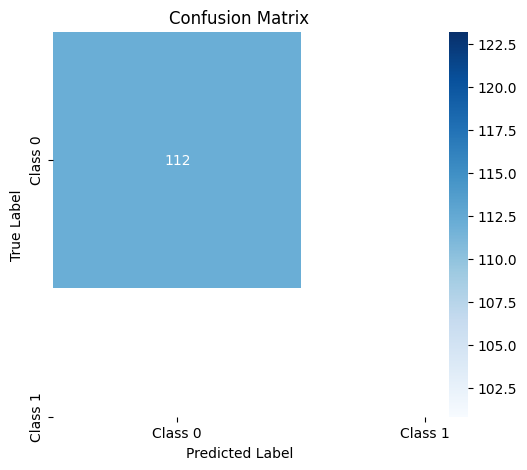

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Flatten for sklearn compatibility
y_true = y_test
y_pred = predictions

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [21]:
from sklearn.metrics import classification_report
import numpy as np

# Convert to 1D arrays
y_true_labels = np.array(y_true).astype(int).ravel()
y_pred_labels = np.array(y_pred).astype(int).ravel()

# Get unique classes present in the data
unique_classes = np.unique(np.concatenate((y_true_labels, y_pred_labels)))

# Create dynamic target names
target_names = [f"Class {cls}" for cls in unique_classes]

# Print classification report
print("Classification Report:\n")
print(classification_report(y_true_labels, y_pred_labels, target_names=target_names))


Classification Report:

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00       112

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


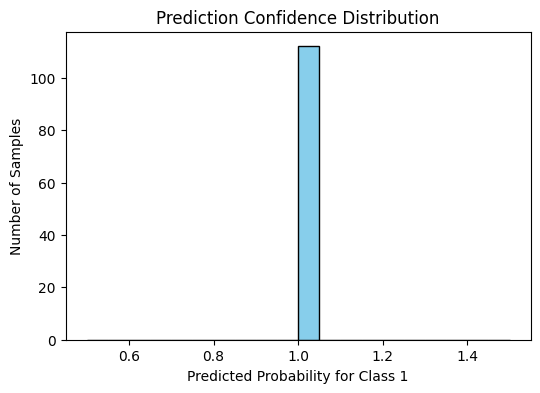

In [22]:
# Get prediction probabilities before threshold
pred_probs = model.predict(X_test)

plt.figure(figsize=(6, 4))
plt.hist(pred_probs, bins=20, color='skyblue', edgecolor='black')
plt.title("Prediction Confidence Distribution")
plt.xlabel("Predicted Probability for Class 1")
plt.ylabel("Number of Samples")
plt.show()


In [23]:
# Save the trained model
model.save("my_model.h5")

# Save training history
import numpy as np
np.save("history.npy", history.history)

# (Optional) Save test data if you want to run metrics later
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
